<a href="https://colab.research.google.com/github/Tusharbhawsar/Feature-Engineering/blob/main/Feature%20Scaling/Z-score%20or%20Standardlisation/Z_score_Standardlisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
path="/content/drive/MyDrive/excel files/Feature Engeering/Social_Network_Ads.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                               df["Purchased"],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((280, 2), (120, 2))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# fit the scaler to the trainset,it will learn the parameter
scaler.fit(x_train)

# transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [ ]:
#its a numpy array ,convert this below steps
x_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [ ]:
# to convert the numpy array into dataframe
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [ ]:
#converted
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [ ]:
import numpy as np

In [ ]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
#prove that standard devation is 1 & mean is 0
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'After Scaling')

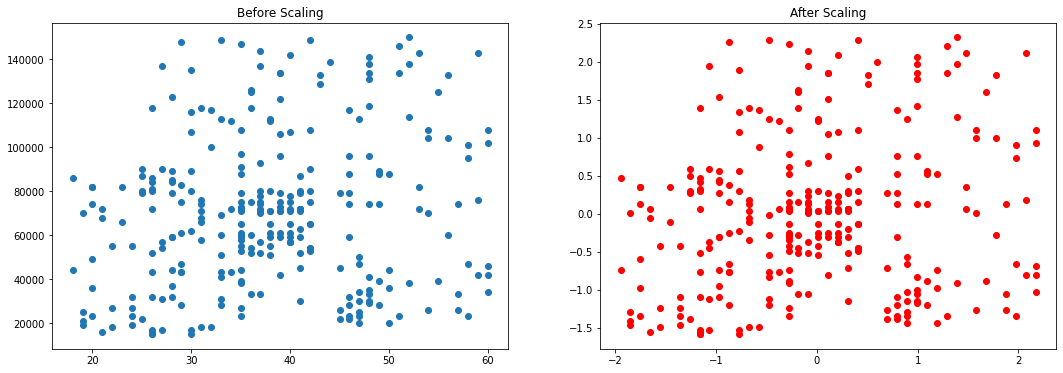

In [ ]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(18,6))

ax1.scatter(x_train["Age"],x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"],color="red")
ax2.set_title("After Scaling")

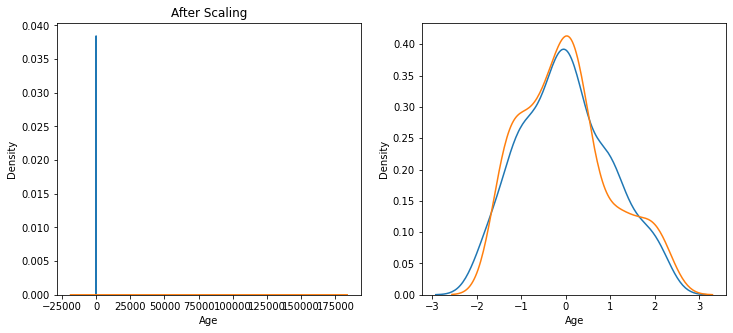

In [ ]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Age"],ax=ax1)
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1)

#After Scaling
ax1.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"],ax=ax2)

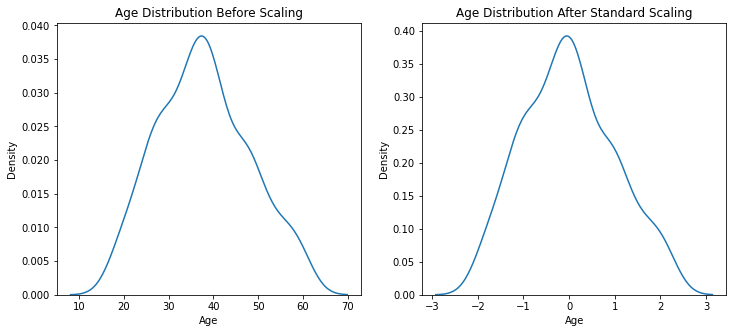

In [ ]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#Before Scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(x_train["Age"],ax=ax1)

#After Scaling
ax2.set_title("Age Distribution After Standard Scaling")
sns.kdeplot(x_train_scaled["Age"],ax=ax2)

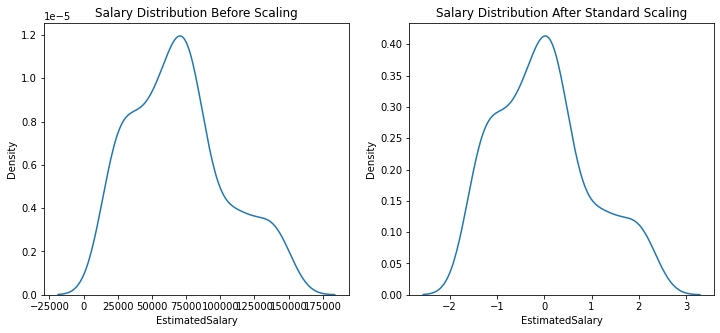

In [ ]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#Before Scaling
ax1.set_title("Salary Distribution Before Scaling")
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1)

#After Scaling
ax2.set_title("Salary Distribution After Standard Scaling")
sns.kdeplot(x_train_scaled["EstimatedSalary"],ax=ax2)

## Why Scaling is Important ?

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667
